## View Galaxies in one HP
- author : Sylvie Dagoret-Campagne
- afflilation : IJCLab/IN2P3/CNRS
- creation date : 2025-03-10
- last update : 2025-03-10
- nersc python KERNEL : desc-python, or desc-python-bleed

In [18]:
import galsim
import os
import pandas as pd
import h5py

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

props = dict(boxstyle='round', facecolor="white", alpha=0.1)


import matplotlib.colors as colors
import matplotlib.cm as cmx

In [5]:
datadir = "/global/cfs/cdirs/descssim/imSim/skyCatalogs_v1.1.2"
throughputs_dir = "/global/cfs/cdirs/descssim/imSim/lsst/data/throughputs_aug_2021"

In [6]:
os.environ["THROUGHPUTS_DIR"] = throughputs_dir

### Select one HP 

In [7]:
hpnum = 10552

In [29]:
fn_sed = f"galaxy_sed_{hpnum}.hdf5"
fn_galaxy = f"galaxy_{hpnum}.parquet"
fn_flux = f"galaxy_flux_{hpnum}.parquet"

In [30]:
ffn_sed = os.path.join(datadir,fn_sed)
if not os.path.exists(ffn_sed):
    raise Exception(f"File {ffn_sed} DOES NOT exists")
else:
    with h5py.File(ffn_sed, "r") as f:
        a_group_key = list(f.keys())[0]
        print(a_group_key)
        data = list(f[a_group_key])
        print(data[0])

galaxy
105520000


In [31]:
ffn_galaxy = os.path.join(datadir,fn_galaxy)
if not os.path.exists(ffn_sed):
    raise Exception(f"File {ffn_galaxy} DOES NOT exists")
else:
    df_g = pd.read_parquet(ffn_galaxy)

In [35]:
df_g .head()

,galaxy_id,ra,dec,redshift,redshiftHubble,peculiarVelocity,shear1,shear2,convergence,spheroidHalfLightRadiusArcsec,diskHalfLightRadiusArcsec,diskEllipticity1,diskEllipticity2,spheroidEllipticity1,spheroidEllipticity2,um_source_galaxy_obs_sm,MW_rv,MW_av
0,10552000641759,14.027356,-45.894913,0.988409,0.987509,135.722885,-0.000339,0.004834,-0.011072,0.085181,0.172449,0.559845,-0.316807,0.143754,-0.081348,2.713609e+08,3.1,0.028705
1,10552000641760,14.046155,-46.120298,0.984433,0.986193,-265.799133,-0.010552,-0.008909,-0.010174,0.095955,0.188054,-0.482565,-0.434454,-0.415784,-0.374330,2.489032e+09,3.1,0.031167
2,10552000641762,14.118341,-45.953655,0.983952,0.983818,20.259741,-0.003541,-0.002860,-0.004289,0.039816,0.082794,0.334760,-0.057840,0.036426,-0.006294,3.144186e+07,3.1,0.027680
3,10552000641763,15.107370,-46.702310,0.976181,0.975548,95.939423,0.013209,0.008118,-0.008900,0.049019,0.102367,-0.050486,-0.205594,-0.011172,-0.045495,1.317728e+08,3.1,0.029542
4,10552000641766,14.054153,-45.740775,0.953813,0.960345,-1000.463501,0.002223,-0.010178,0.001170,0.052712,0.110844,-0.061919,0.001511,-0.039471,0.000963,1.256056e+08,3.1,0.036054


In [41]:
len(df_g)

2384710

<Axes: >

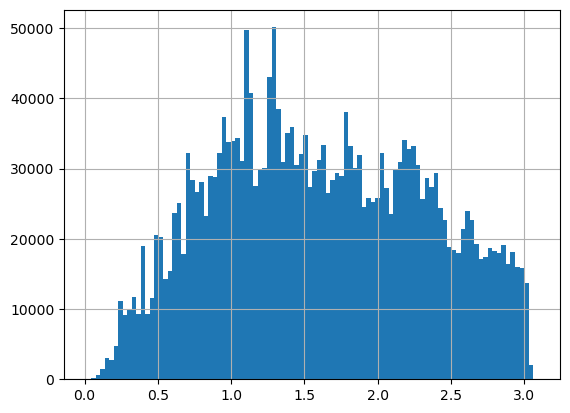

In [42]:
df_g["redshift"].hist(bins=100)

In [36]:
ffn_flux = os.path.join(datadir,fn_flux)
if not os.path.exists(ffn_flux):
    raise Exception(f"File {ffn_fluxy} DOES NOT exists")
else:
    df_f = pd.read_parquet(ffn_flux)

In [37]:
df_f .head()

,galaxy_id,lsst_flux_u,lsst_flux_g,lsst_flux_r,lsst_flux_i,lsst_flux_z,lsst_flux_y,roman_flux_W146,roman_flux_R062,roman_flux_Z087,roman_flux_Y106,roman_flux_J129,roman_flux_H158,roman_flux_F184,roman_flux_K213
0,10552000641759,7.238643e-06,0.000037,0.000034,0.000035,0.000033,0.000018,0.000478,0.000085,0.000117,0.000135,0.000147,0.000158,0.000123,0.000116
1,10552000641760,1.186614e-05,0.000063,0.000064,0.000075,0.000079,0.000046,0.001435,0.000161,0.000275,0.000352,0.000424,0.000506,0.000411,0.000412
2,10552000641762,1.188626e-06,0.000006,0.000006,0.000006,0.000006,0.000003,0.000087,0.000014,0.000021,0.000024,0.000026,0.000029,0.000023,0.000022
3,10552000641763,8.450239e-07,0.000004,0.000004,0.000004,0.000004,0.000002,0.000062,0.000010,0.000015,0.000017,0.000019,0.000021,0.000016,0.000015
4,10552000641766,5.162143e-07,0.000003,0.000002,0.000003,0.000002,0.000001,0.000035,0.000006,0.000009,0.000010,0.000011,0.000012,0.000009,0.000009


In [39]:
len(df_f)

2384710